In [ ]:
import pandas as pd
df = pd.read_excel('reviews.xlsx')
df.head()

In [ ]:
!pip install -q nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)
df['processed_comment'] = df['comment'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to /home/noteable/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/noteable/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/noteable/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
features = vectorizer.fit_transform(df['processed_comment']).toarray()
features.shape

(191, 876)

In [ ]:
!pip install -q textblob
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
df['sentiment'] = df['processed_comment'].apply(get_sentiment)
df.head()

In [ ]:
!pip install -q gensim
from gensim import corpora, models
processed_comments = df['processed_comment'].apply(word_tokenize)
dictionary = corpora.Dictionary(processed_comments)
corpus = [dictionary.doc2bow(text) for text in processed_comments]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
topics = lda_model.print_topics(num_words=5)
topics

[(0,
  '0.041*"service" + 0.031*"customer" + 0.018*"teller" + 0.016*"bank" + 0.014*"one"'),
 (1,
  '0.017*"line" + 0.013*"one" + 0.013*"account" + 0.010*"open" + 0.010*"’"'),
 (2,
  '0.033*"bank" + 0.028*"customer" + 0.023*"service" + 0.016*"worst" + 0.015*"teller"'),
 (3,
  '0.030*"bank" + 0.016*"service" + 0.015*"people" + 0.014*"customer" + 0.013*"good"'),
 (4,
  '0.015*"’" + 0.015*"check" + 0.014*"deposit" + 0.013*"always" + 0.013*"customer"')]

In [ ]:
df['sentiment_value'] = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
correlation = df[['sentiment_value', 'month', 'day_of_week']].corr()
correlation

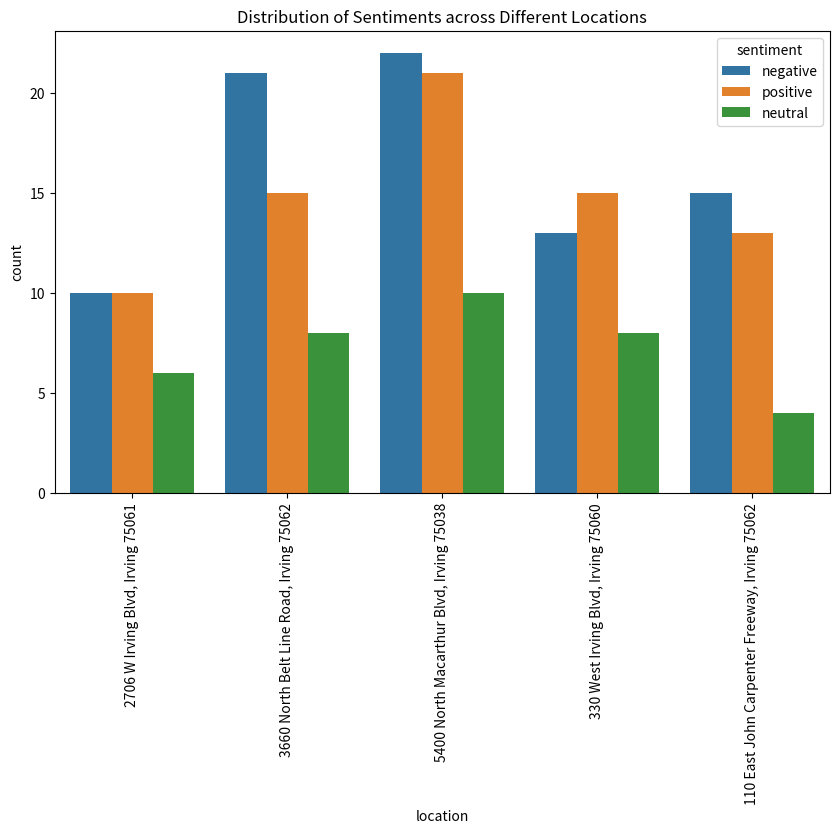

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='location', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Distribution of Sentiments across Different Locations')
plt.show()

TypeError: Input type must be str

In [ ]:
df['date'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [ ]:
df = df.dropna(subset=['date'])
df['actual_date'] = df['date'].apply(lambda x: dateparser.parse(x, settings={'RELATIVE_BASE': reference_date}))
df.head()

IndexError: index 0 is out of bounds for axis 0 with size 0

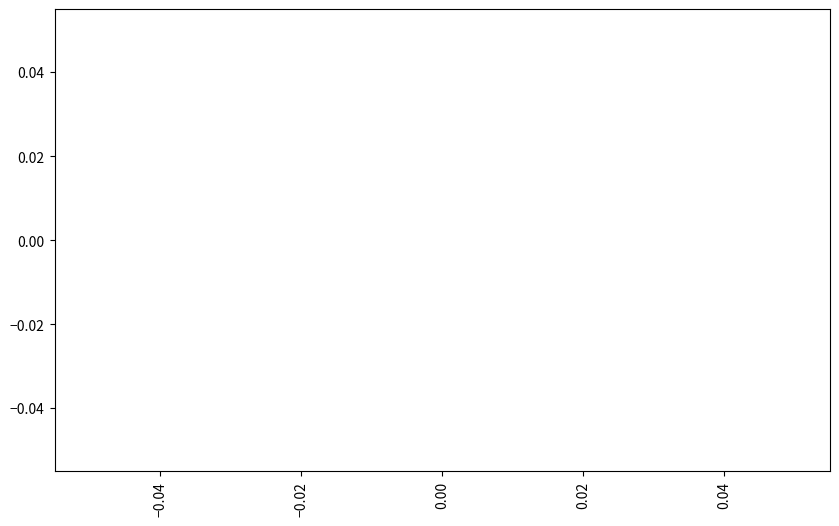

In [ ]:
df['response'].unique()

array([], dtype=object)

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='location', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Distribution of Sentiments across Different Locations')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>